In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
loan_eligible_train_df = pd.read_csv("/kaggle/input/loan-eligible-dataset/loan-train.csv")
loan_eligible_test_df = pd.read_csv("/kaggle/input/loan-eligible-dataset/loan-test.csv")

In [35]:
loan_eligible_train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,1
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


In [10]:
loan_eligible_train_df.drop("Loan_ID",axis = 1,inplace = True)

In [16]:
loan_eligible_train_df["Property_Area"].value_counts() # To see if how many values does property area column have.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [26]:
loan_eligible_train_df["Dependents"].value_counts() 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [32]:
loan_eligible_train_df = loan_eligible_train_df.dropna(subset = ["Dependents"])

In [ ]:
loan_eligible_train_df["Married"] = loan_eligible_train_df["Married"].replace({"Yes":1, "No":0})
loan_eligible_train_df["Gender"] = loan_eligible_train_df["Gender"].replace({"Male":1, "Female":0})
loan_eligible_train_df["Education"] = loan_eligible_train_df["Education"].replace({"Graduate":1, "Not Graduate":0})
loan_eligible_train_df["Self_Employed"] = loan_eligible_train_df["Self_Employed"].replace({"Yes":1, "No":0})
loan_eligible_train_df['Property_Area'] = pd.factorize(loan_eligible_train_df['Property_Area'])[0] + 1
loan_eligible_train_df["Loan_Status"] = loan_eligible_train_df["Loan_Status"].replace({"Y":1,"N":1})
loan_eligible_train_df["Dependents"] = loan_eligible_train_df["Dependents"].replace({"3+":3}).astype(int)

In [25]:
loan_eligible_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    float64
 1   Married            611 non-null    float64
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 57.7+ KB


In [45]:
# Anladığım kadarıyla önce nullarla uğraşmam lazım correlationa bakıp tahmin yapıp ekleyedebilirim ya da drop da edebilirim.
loan_eligible_train_df.isna().sum()

Loan_ID                     91
Dependents                  91
ApplicantIncome             91
CoapplicantIncome           91
LoanAmount                  91
Loan_Amount_Term            91
Credit_History             134
Gender_Female               91
Gender_Male                 91
Married_No                  14
Married_Yes                 14
Married_nan                 14
Education_Graduate           3
Education_Not Graduate       3
Education_nan                3
Self_Employed_No             0
Self_Employed_Yes            0
Self_Employed_nan            0
Property_Area_Rural          0
Property_Area_Semiurban      0
Property_Area_Urban          0
Property_Area_nan            0
Loan_Status_N                0
Loan_Status_Y                0
Loan_Status_nan              0
dtype: int64

In [40]:
loan_eligible_train_df = loan_eligible_train_df.dropna(subset=["Gender","Dependents","Self_Employed","LoanAmount","Loan_Amount_Term"])

In [42]:
def one_hot_encoder(df,col):
    encoder = OneHotEncoder()
    encoded_data = encoder.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(encoded_data.toarray(),columns=encoder.get_feature_names_out([col]))
    df = pd.concat([df,encoded_df],axis = 1)
    df = df.drop(col,axis = 1)
    return df

In [43]:
loan_eligible_train_df = one_hot_encoder(loan_eligible_train_df,"Gender")
loan_eligible_train_df = one_hot_encoder(loan_eligible_train_df,"Married")
loan_eligible_train_df = one_hot_encoder(loan_eligible_train_df,"Education")
loan_eligible_train_df = one_hot_encoder(loan_eligible_train_df,"Self_Employed")
loan_eligible_train_df = one_hot_encoder(loan_eligible_train_df,"Property_Area")
loan_eligible_train_df = one_hot_encoder(loan_eligible_train_df,"Loan_Status")
loan_eligible_train_df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,...,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan,Loan_Status_N,Loan_Status_Y,Loan_Status_nan
1,LP001003,1,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,LP001005,0,3000.0,0.0,66.0,360.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,LP001006,0,2583.0,2358.0,120.0,360.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,LP001008,0,6000.0,0.0,141.0,360.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,LP001011,2,5417.0,4196.0,267.0,360.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [46]:
loan_eligible_train_df.dropna(axis = 1,inplace = True)

In [6]:
loan_eligible_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [52]:
correlation_matrix = loan_eligible_train_df.corr()
corr_loan_status = correlation_matrix["Loan_Status_Y"].sort_values(ascending=False)
corr_loan_status

Loan_Status_Y              1.000000
Self_Employed_No           0.371776
Property_Area_Semiurban    0.256835
Property_Area_Urban        0.107713
Self_Employed_Yes          0.051247
Property_Area_Rural        0.027251
Self_Employed_nan         -0.508457
Property_Area_nan         -0.508457
Loan_Status_nan           -0.508457
Loan_Status_N             -0.711400
Name: Loan_Status_Y, dtype: float64

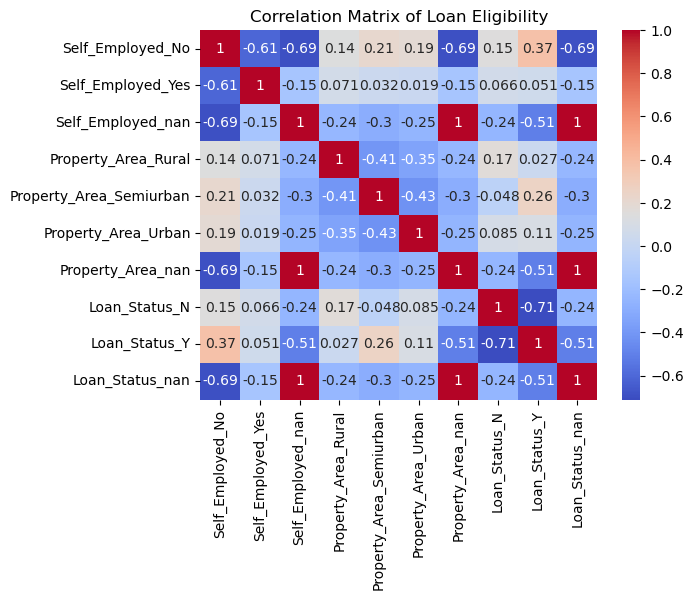

In [53]:
sns.heatmap(correlation_matrix,annot = True,cmap="coolwarm")
plt.title("Correlation Matrix of Loan Eligibility")
plt.show()

In [55]:
# Binary Classification için ML modeli bulmam lazım.
x_train = loan_eligible_train_df.drop(["Loan_Status_Y","Loan_Status_N","Loan_Status_nan"],axis = 1)
y_train = loan_eligible_train_df["Loan_Status_Y"]

print(x_train.shape)
print(y_train.shape)

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict()

(614, 7)
(614,)
